# Plot Filament Shapes, Unique Locations Sampled (Figure 2 panels)

In [15]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
    if 'pyfilaments.analysisutils' in sys.modules.keys():
        print('Reloading the analysis module')
        del(sys.modules['pyfilaments.analysisutils'])
        
    
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
import pandas as pd
import h5py

%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure2'

import _figure_parameters
import cmocean

Reloading the analysis module
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 

In [24]:
# Load a file

#Periodic (2)
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/SimResults_00_.hdf5'
# Period-6
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/SimResults_00_.hdf5'

# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/SimResults_00_.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/SimResults_00_.hdf5'
# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point/SimResults_01_.hdf5'


# log-normal dist
file = '/home/deepak/ActiveFilamentsSearch_backup_3/Lognormal_distribution/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.75_activityTime_150_simType_lacry/sim_data_00_.hdf5'
filament = analysis.analysisTools(file = file)


## Short-term Filament Shape Evolution and Tip-speed Plot

In [149]:
# Plotting parameters
start_cycle = 200
end_cycle = 201

filament_stride = 4
tip_stride = 2


# Compute the Tip velocity
filament.compute_tip_velocity() 

constant_phase_indices = filament.find_constant_phase_indices()

delta_T = filament.Time[1] - filament.Time[0]

N_t_cycle = int(filament.activity_timescale/delta_T) # No:of time points per cycle
time_points = np.array(range(0, filament.Nt))

# Find the time indices we are plotting
indices_to_plot = time_points[constant_phase_indices[start_cycle]:constant_phase_indices[end_cycle]:filament_stride]
indices_to_plot_tip = time_points[constant_phase_indices[start_cycle]:constant_phase_indices[end_cycle]:tip_stride]

# Store the filament shapes we want to plot and activity profile
filament_shapes = filament.R[indices_to_plot,:]
activity_profile = filament.activity_profile[indices_to_plot]

# Find the non-dimensional tip speed
tip_speed_nd = filament.derived_data['tip speed'][indices_to_plot_tip]/filament.velocity_scale

### Plot the filament shapes within a given Time window. 

Color the filament by Activity Phase and Tip Trajectory by the tip speed.

<IPython.core.display.Javascript object>


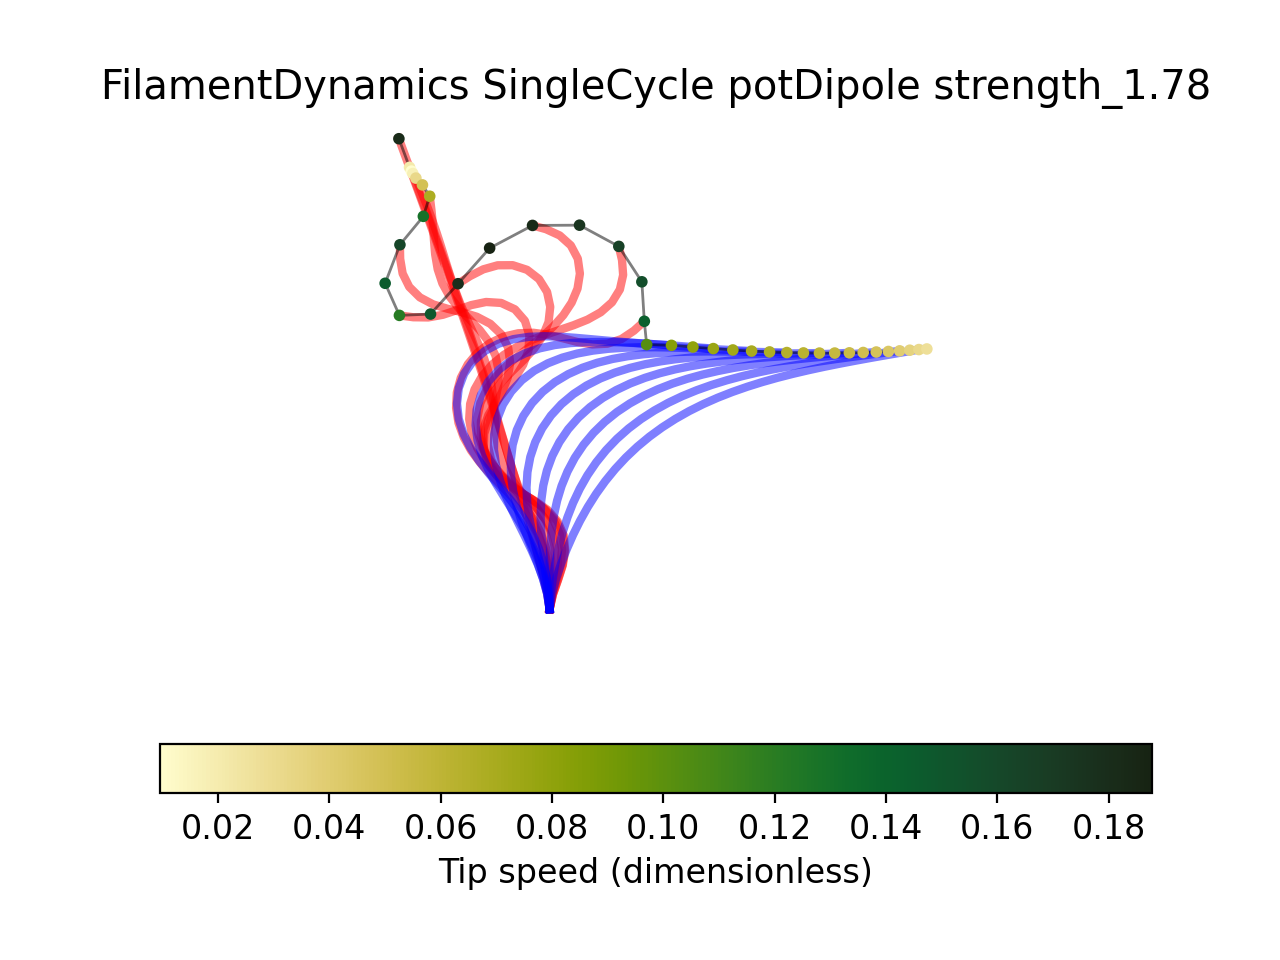

In [153]:
parameter = 'potDipole strength'
save = True

plt.figure()
title = "FilamentDynamics SingleCycle {}_{}".format(parameter, round(filament.df_metadata[parameter][0],2))
for ii in range(len(indices_to_plot)):
    
    time = filament.Time[indices_to_plot[ii]]
    
    activity = activity_profile[ii]
    
    r = filament_shapes[ii]
    
   
    first_index = 0
    second_index = filament.Np
    
    x_pos = r[first_index:first_index+filament.Np]
    y_pos = r[second_index:second_index+filament.Np]
    
    if(activity>0):
        plt.plot(y_pos, x_pos, color = 'b', alpha = 0.5, zorder = 0, linewidth = 3)
    elif(activity<=0):
        
        plt.plot(y_pos, x_pos, color = 'r', alpha = 0.5, zorder = 0, linewidth = 3)

    
# Add the tip locations, Colored by Speed
ax2 = plt.scatter(filament.derived_data['head pos y'][indices_to_plot_tip], 
                  filament.derived_data['head pos x'][indices_to_plot_tip], 10, c = tip_speed_nd, 
                  cmap = cmocean.cm.speed, alpha = 1, zorder = 5)

ax3 = plt.plot(filament.derived_data['head pos y'][indices_to_plot_tip], 
                  filament.derived_data['head pos x'][indices_to_plot_tip], zorder = 4, color ='k', alpha = 0.5, linewidth = 1)
plt.axis('equal')

plt.title(title)

plt.axis('off')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Tip speed (dimensionless)')

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()

<IPython.core.display.Javascript object>


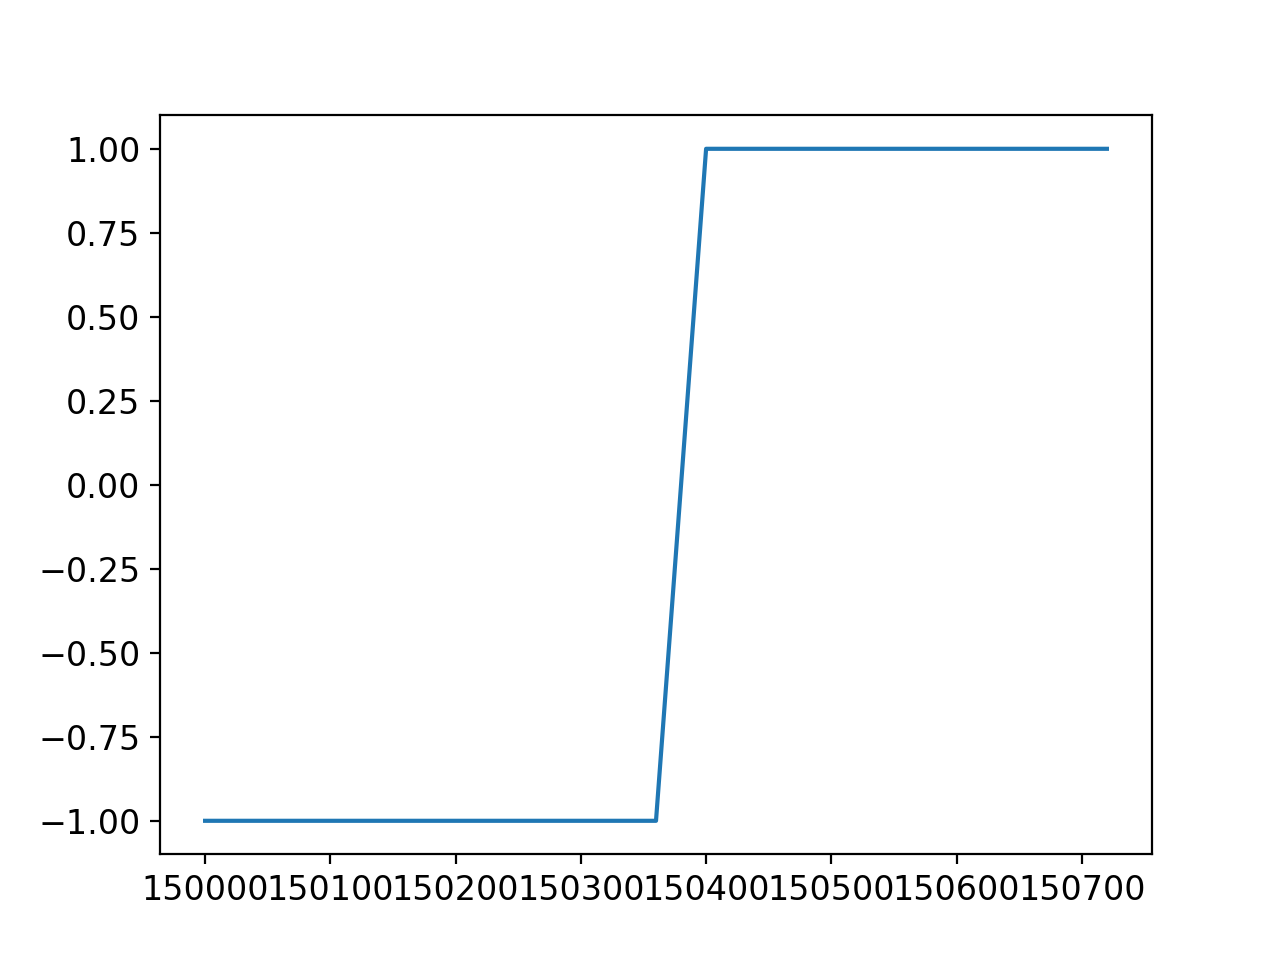

In [134]:
plt.figure()
plt.plot(filament.Time[indices_to_plot], activity_profile)
plt.show()

array([[ 1.40104267e-10,  2.16036331e+00,  4.31495048e+00,
         6.46591570e+00,  8.61472636e+00,  1.07620696e+01,
         1.29081361e+01,  1.50528533e+01,  1.71960170e+01,
         1.93373624e+01,  2.14765980e+01,  2.36134213e+01,
         2.57475375e+01,  2.78786750e+01,  3.00065894e+01,
         3.21310661e+01,  3.42519403e+01,  3.63691121e+01,
         3.84825385e+01,  4.05922356e+01,  4.26983074e+01,
         4.48009550e+01,  4.69004523e+01,  4.89971555e+01,
         5.10915513e+01,  5.31842728e+01,  5.52760366e+01,
         5.73679572e+01,  5.94606142e+01,  6.15601524e+01,
         6.36501975e+01,  6.58436523e+01,  9.23160067e-13,
        -1.49288780e-01, -3.70309118e-01, -6.27188658e-01,
        -9.04051132e-01, -1.19452304e+00, -1.49669186e+00,
        -1.81068052e+00, -2.13747789e+00, -2.47837300e+00,
        -2.83467868e+00, -3.20759481e+00, -3.59814138e+00,
        -4.00712605e+00, -4.43512743e+00, -4.88248834e+00,
        -5.34931883e+00, -5.83550333e+00, -6.34070629e+0

## Distribution of first passage times

<IPython.core.display.Javascript object>


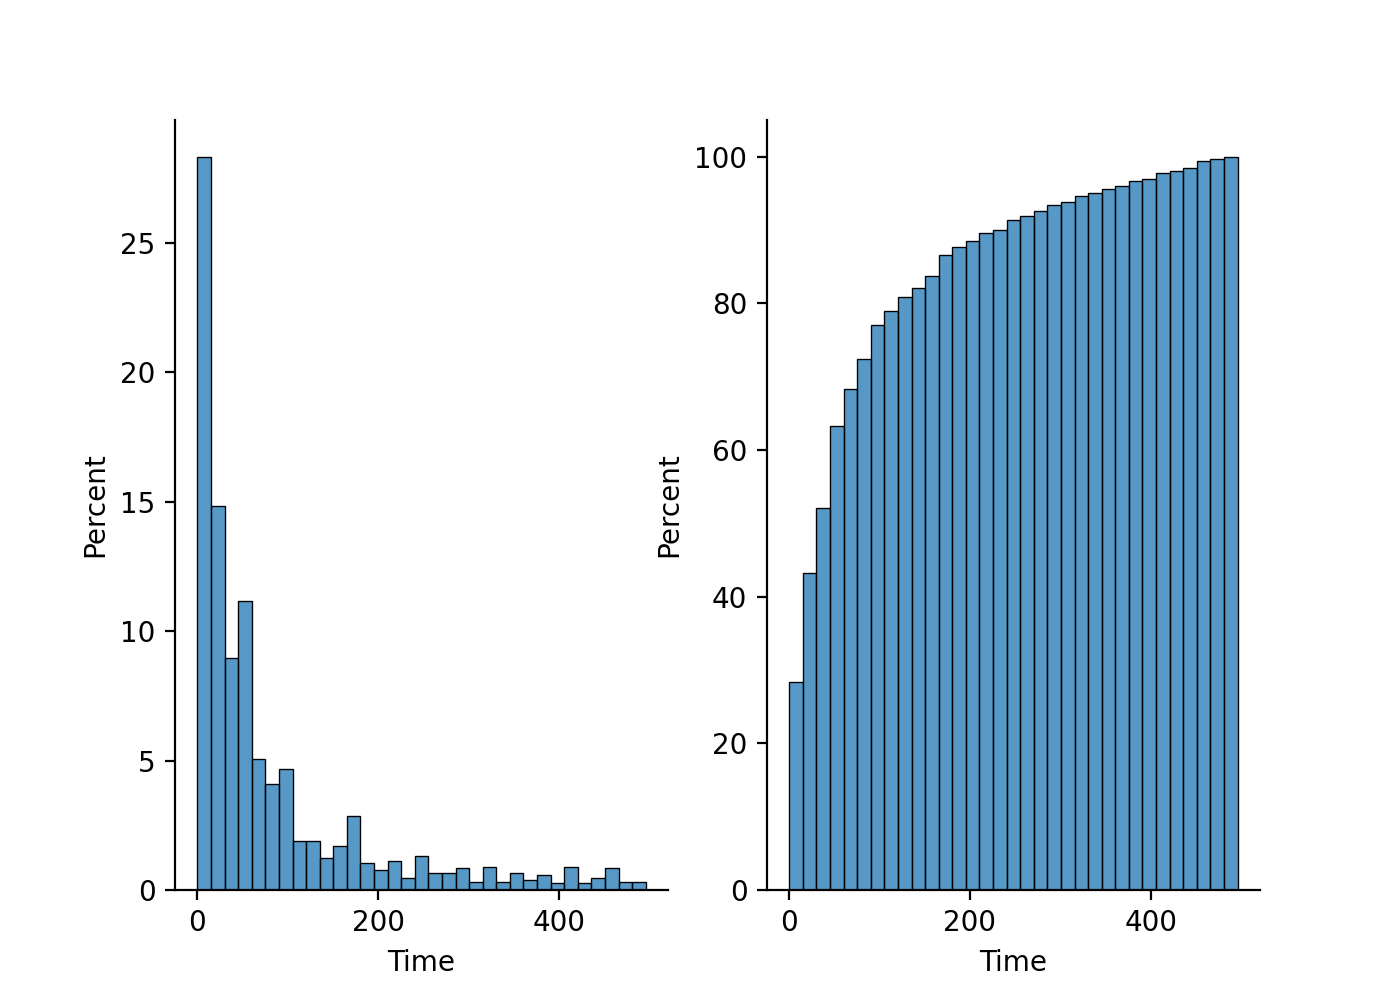

In [5]:
first_passage_cycle = filament.unique_position_times/filament.activity_timescale

f, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 5))
sns.despine(f)

sns.histplot(x = first_passage_cycle, stat = 'percent', ax = ax0)
sns.histplot(x = first_passage_cycle, stat = 'percent', ax = ax1, cumulative=True)
plt.show()

## Plot of Filament Base Tip angle vs Time

In [212]:
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure3'


In [217]:
# Compute the base-tip angle
filament.compute_base_tip_angle()
constant_phase_indices = filament.find_constant_phase_indices()

start_index = constant_phase_indices[400]

print(start_index)

30000


<IPython.core.display.Javascript object>


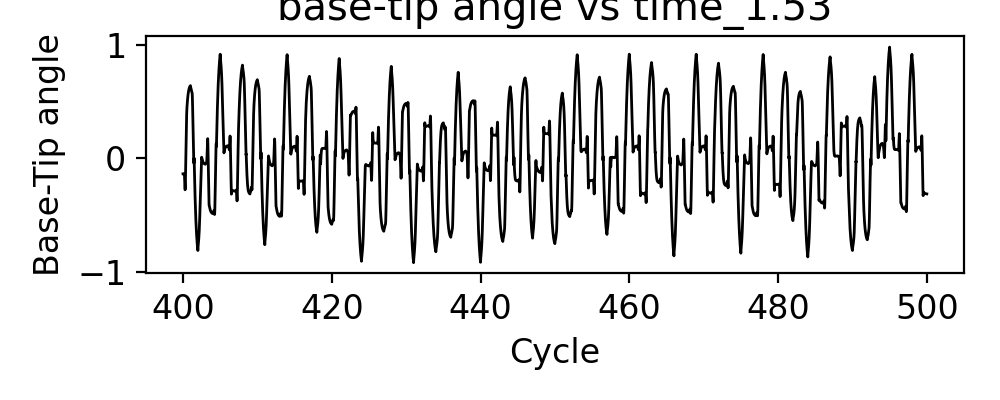

In [218]:
save = True


title = 'base-tip angle vs time_{}'.format(np.round(filament.df_metadata[parameter][0],2))
plt.figure(figsize=(5,2))

sns.lineplot(x = filament.Time[start_index:]/filament.activity_timescale, y = filament.derived_data['base tip angle'][start_index:], linewidth = 1, color = 'k')
plt.xlabel('Cycle')
plt.ylabel('Base-Tip angle')
plt.tight_layout()
plt.title(title)
if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
plt.show()

## Power-spectrum of Base-tip angle dynamics

In [203]:
time_series_data = filament.derived_data['base tip angle']
time_series_data = time_series_data - np.mean(time_series_data)

In [204]:
### FFT of the time-series data
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = filament.activity_timescale*filament.Nt/(max(filament.Time))

print('Time series sample rate: {}'.format(SAMPLE_RATE))
yf = rfft(time_series_data)
xf = rfftfreq(filament.Nt, 1 / SAMPLE_RATE)

Time series sample rate: 75.002


<IPython.core.display.Javascript object>


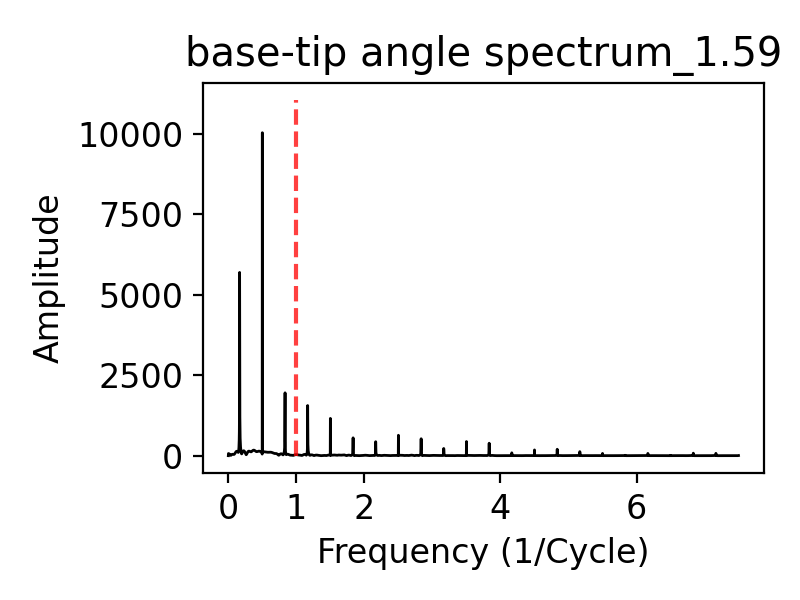

In [205]:
# Plot the FFT of the signal
save = True
title = 'base-tip angle spectrum_{}'.format(np.round(filament.df_metadata[parameter][0],2))


clip_point = int(len(xf)/5)
fig, (ax1) = plt.subplots(nrows=1, ncols = 1, figsize = (4, 3))


ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 1, color = 'k')
# Draw the forcing frequency
plt.vlines(1, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
ax1.set_xlabel('Frequency (1/Cycle)')
ax1.set_ylabel('Amplitude')
ax1.set_title('FFT of time-series')
plt.xticks([0, 1, 2, 4, 6])
plt.tight_layout()
plt.title(title)
if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()